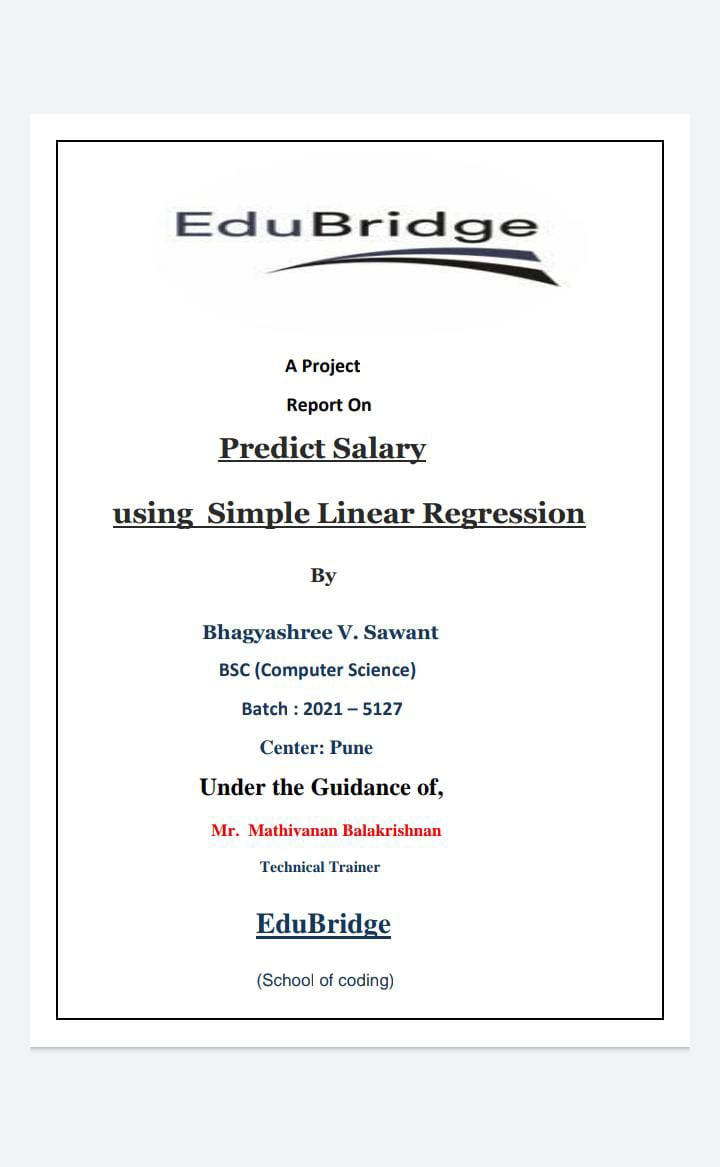

In [1]:
from IPython.display import Image
Image(filename="C:/Users/user1/Documents/Project/img.jpeg",width=900,height=400)

# Introduction :

In this project the main aim is predicting salary of an employee given how many years of experience they have. From this     prediction the salary of an employee can be observed according to their years of experience. We can predict a employee     salary through Simple Linear Regression graph. Here we train a Simple Linear Regression model to learn the correlation between the number of years of experience of each employee and their respective salary. Once the model is trained, we can able to do some sample predictions.

Here, We using the pandas dataframe

In [2]:
# Import libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

# Step 1: Load the Dataset

Below is the code snippet for loading the dataset.

In [3]:
#Load Data
dataset = pd.read_csv('C:/Users/user1/Documents/Project/Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


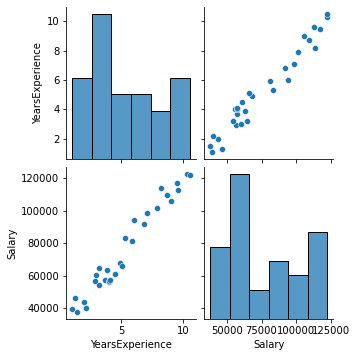

In [4]:
import seaborn as sns
sns.pairplot(dataset)

Here X is the independent variable which is the “Years of Experience” .
So for X, we specify,
dataset.iloc[:, :-1].values
which simply means take all rows and all columns except last one.

In [5]:
x = dataset.iloc[:, :-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

Here y is the dependent variable which is the “Salary”
for y, we specify,
dataset.iloc[:, 1].values
which simply means take all rows and only columns with index 1 
—In python indexes begin at 0 — so index 1 here is the second column which is Salary

In [6]:
y = dataset.iloc[:,1].values 
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [7]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

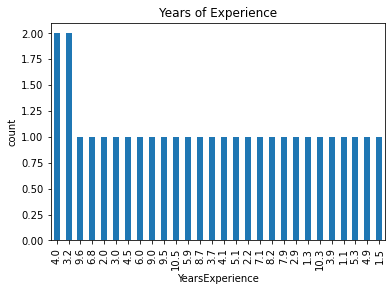

In [9]:
dataset['YearsExperience'].value_counts().plot(kind = 'bar')
plt.title('Years of Experience')
plt.xlabel('YearsExperience')
plt.ylabel('count')
sns.despine

Text(0.5, 1.0, 'Salary Vs Years of Experience')

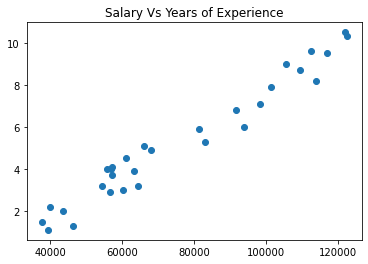

In [10]:
plt.scatter(dataset.Salary,dataset.YearsExperience)
plt.title("Salary Vs Years of Experience")

In [11]:
dataset['Salary'].value_counts()

56957     1
112635    1
56642     1
60150     1
43525     1
83088     1
81363     1
113812    1
121872    1
122391    1
39891     1
91738     1
64445     1
98273     1
67938     1
37731     1
46205     1
57189     1
61111     1
116969    1
54445     1
66029     1
105582    1
39343     1
55794     1
93940     1
101302    1
109431    1
57081     1
63218     1
Name: Salary, dtype: int64

In [12]:
dataset['YearsExperience'].value_counts()

4.0     2
3.2     2
9.6     1
6.8     1
2.0     1
3.0     1
4.5     1
6.0     1
9.0     1
9.5     1
10.5    1
5.9     1
8.7     1
3.7     1
4.1     1
5.1     1
2.2     1
7.1     1
8.2     1
7.9     1
2.9     1
1.3     1
10.3    1
3.9     1
1.1     1
5.3     1
4.9     1
1.5     1
Name: YearsExperience, dtype: int64

# Step 2: Split dataset into training set and test set

Next we split the dataset into training and testing. We use the training dataset for training the model and then check the performance of the model on the test dataset.
For this we use the train_test_split method from library model_selection
We are providing a test_size of 1/3 which means test set will contain 10 observations and training set will contain 20 observations.
The random_state=0 it defines what will be the random selection of data which is distributed in test & train.

In [13]:
# Split data into training and testing
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10, random_state=0) 

# Step 3: Fit Simple Linear Regression model to training set

We will be using the LinearRegression class from the library sklearn.linear_model. First we create an object of the LinearRegression class and call the fit method passing the X_train and y_train.

In [14]:
#Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

# Step 4: Predict the test set

Using the regressor we trained in the previous step, we now use it to predict the results of the test set and compare the predicted values with the actual values.

In [15]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088, 101302], dtype=int64)

In [16]:
# Step 4: Make Prediction
y_pred = regressor.predict(x_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

Now we have the y_pred which are the predicted values from our Model and y_test which are the actual values.
Let us compare and see how well our model did. As we can see from the above output — our basic model did pretty well.
If we take the first employee — the actual salary is 37731 and our model predicted 40835.1 — which is not too bad. There are some predictions that are off but some are pretty close.

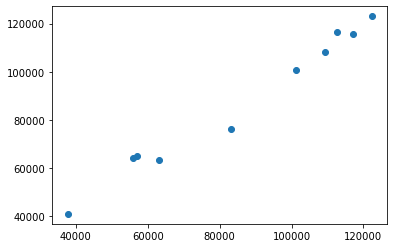

In [17]:
plt.scatter(y_test, y_pred)

(array([2., 0., 1., 1., 0., 3., 2., 0., 0., 1.]),
 array([-8405.96201652, -6891.53453413, -5377.10705173, -3862.67956934,
        -2348.25208694,  -833.82460455,   680.60287784,  2195.03036024,
         3709.45784263,  5223.88532503,  6738.31280742]),
 <BarContainer object of 10 artists>)

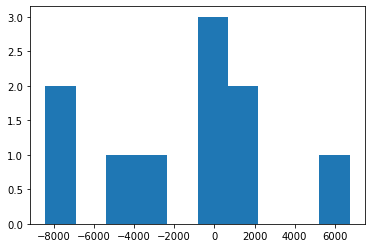

In [18]:
plt.hist(y_test - y_pred)

# Step 5 — Visualizing the training set

Let’s visualize the train results here.
First we plot the actual data points of training set — X_train and y_train using plt.scatter(X_train, y_train, color = ‘red’).
Next we plot the regression line — which is the predicted values for the X_train
using plt.plot(X_train, regressor.predict(X_train), color=’blue’)

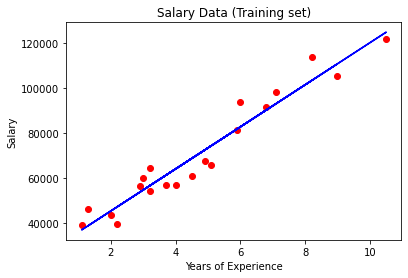

In [19]:
#Visualize training set results
# plot the actual data points of training set
plt.scatter(x_train, y_train, color = 'red')
# plot the regression line
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary Data (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Step 6 — Visualizing the test set

Let’s visualize the test results here.
First we plot the actual data points of training set — X_test and y_test using
plt.scatter(X_test, y_test, color = ‘red’)
Next we plot the regression line — which is the same as above in training set using
plt.plot(X_train, regressor.predict(X_train), color=’blue’)

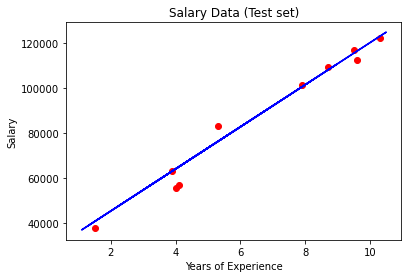

In [20]:
# Step 6 - Visualize test set results
#import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(x_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary Data (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Step 7 — Make new predictions

Here, We did new prediction for data points that do not exist in the dataset. Like for a person with 15 years experience

In [21]:
# New prediction
new_salary_pred = regressor.predict([[15]])
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [167005.32889087]


In [22]:
from sklearn import metrics

In [23]:
metrics.mean_absolute_error(y_test, y_pred)

3426.42693743071

In [24]:
metrics.mean_squared_error(y_test, y_pred)

21026037.329511303

In [25]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

4585.415720467589